# IMPORT

In [ ]:
import pandas as pd

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
!pip install datasets

# 데이터셋 기초작업

## 허깅페이스 데이터셋

In [ ]:
from datasets import load_dataset

ds_hate_speech18 = load_dataset("tweets_hate_speech_detection")

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (/root/.cache/huggingface/datasets/tweets_hate_speech_detection/default/0.0.0/3e953745870454cf8ff15cc48097dbb5ff459596e0a089867c2a29cee63984ec)


In [ ]:
# 데이터프레임으로 저장
pd.DataFrame.from_dict(ds_hate_speech18['train']).to_csv("/content/drive/MyDrive/HateSpeech/Tweet_hate_speech_detection/tweets_hate_speech_detection.csv")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HateSpeech/DT/hate_offensive.csv')
df

,Unnamed: 0,hate_speech_annotations,label,neither_annotations,offensive_language_annotations,total_annotation_count,tweet
0,0,0,2,3,0,3,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,0,1,0,3,3,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,0,1,0,3,3,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,1,1,2,3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,0,1,0,6,6,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,24778,0,1,1,2,3,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,24779,0,2,2,1,3,"you've gone and broke the wrong heart baby, an..."
24780,24780,0,1,0,3,3,young buck wanna eat!!.. dat nigguh like I ain...
24781,24781,0,1,0,6,6,youu got wild bitches tellin you lies


## Get Tweets from TweetID

### FOUNTA

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/HateSpeech/FOUNTA/hatespeechtwitter.csv")
df = df.dropna()


In [ ]:
df['maj_label'].unique()

array(['abusive', 'normal', 'hateful', 'spam'], dtype=object)

In [ ]:
df_abusive = df[df['maj_label']=='abusive']
df_normal = df[df['maj_label']=='normal']
df_hateful = df[df['maj_label']=='hateful']
df_spam = df[df['maj_label']=='spam']

In [ ]:
df_normal.to_csv("/content/drive/MyDrive/HateSpeech/FOUNTA/df_normal.csv")
df_abusive.to_csv("/content/drive/MyDrive/HateSpeech/FOUNTA/df_abusive.csv")
df_hateful.to_csv("/content/drive/MyDrive/HateSpeech/FOUNTA/df_hateful.csv")
df_spam.to_csv("/content/drive/MyDrive/HateSpeech/FOUNTA/df_spam.csv")

In [ ]:
df_01 = pd.read_csv("https://raw.githubusercontent.com/ZeerakW/hatespeech/master/NAACL_SRW_2016.csv",header=None)
df_01.columns = ['TweetID','class']
df_01

,TweetID,class
0,572342978255048705,racism
1,572341498827522049,racism
2,572340476503724032,racism
3,572334712804384768,racism
4,572332655397629952,racism
...,...,...
16902,576359685843861505,none
16903,576612926838046720,none
16904,576771329975664640,none
16905,560595245814267905,none


In [ ]:
df_01[df_01['class']!='none']

,TweetID,class
0,572342978255048705,racism
1,572341498827522049,racism
2,572340476503724032,racism
3,572334712804384768,racism
4,572332655397629952,racism
...,...,...
5343,570244879265206272,sexism
5344,571013698111860736,sexism
5345,571304517930774528,sexism
5346,575664315627216896,sexism


In [ ]:
df_01[df_01['class']=='none'].to_csv("/content/drive/MyDrive/HateSpeech/WZ-LS/NAACL_SRW_2016_none.csv")
df_01[df_01['class']!='none'].to_csv("/content/drive/MyDrive/HateSpeech/WZ-LS/NAACL_SRW_2016_hate.csv")

### WZ-LS

In [ ]:
df_02 = pd.read_csv("https://raw.githubusercontent.com/ZeerakW/hatespeech/master/NLP%2BCSS_2016.csv",sep='\t')
df_02

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,

,TweetID,Expert,Amateur_0,Amateur_1,Amateur_2,Amateur_3,Amateur_4,Amateur_5,Amateur_6,Amateur_7,Amateur_8,Amateur_9,Amateur_10,Amateur_11,Amateur_12,Amateur_13,Amateur_14,Amateur_15,Amateur_16,Amateur_17,Amateur_18,Amateur_19,Amateur_20,Amateur_21,Amateur_22,Amateur_23,Amateur_24,Amateur_25,Amateur_26,Amateur_27,Amateur_28,Amateur_29,Amateur_30,Amateur_31,Amateur_32,Amateur_33,Amateur_34,Amateur_35,Amateur_36,Amateur_37,...,Amateur_1049,Amateur_1050,Amateur_1051,Amateur_1052,Amateur_1053,Amateur_1054,Amateur_1055,Amateur_1056,Amateur_1057,Amateur_1058,Amateur_1059,Amateur_1060,Amateur_1061,Amateur_1062,Amateur_1063,Amateur_1064,Amateur_1065,Amateur_1066,Amateur_1067,Amateur_1068,Amateur_1069,Amateur_1070,Amateur_1071,Amateur_1072,Amateur_1073,Amateur_1074,Amateur_1075,Amateur_1076,Amateur_1077,Amateur_1078,Amateur_1079,Amateur_1080,Amateur_1081,Amateur_1082,Amateur_1083,Amateur_1084,Amateur_1085,Amateur_1086,Amateur_1087,Amateur_1088 Amateur_1089
597576902212063232,neither,neither,neither,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565586175864610817,neither,neither,neither,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563881580209246209,neither,neither,neither,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
595380689534656512,neither,neither,sexism,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563757610327748608,neither,neither,neither,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569176414999588864,neither,neither,neither,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
571437409843306496,sexism,sexism,sexism,sexism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569743990897057792,neither,neither,neither,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,

In [ ]:
df_02.columns = [f"Ano_{i}" for i in range(1091)]
df_02 = df_02.reset_index()
df_02_ID = df_02['index'].copy()
df_02=df_02.drop(columns='index')
df_02

,Ano_0,Ano_1,Ano_2,Ano_3,Ano_4,Ano_5,Ano_6,Ano_7,Ano_8,Ano_9,Ano_10,Ano_11,Ano_12,Ano_13,Ano_14,Ano_15,Ano_16,Ano_17,Ano_18,Ano_19,Ano_20,Ano_21,Ano_22,Ano_23,Ano_24,Ano_25,Ano_26,Ano_27,Ano_28,Ano_29,Ano_30,Ano_31,Ano_32,Ano_33,Ano_34,Ano_35,Ano_36,Ano_37,Ano_38,Ano_39,...,Ano_1051,Ano_1052,Ano_1053,Ano_1054,Ano_1055,Ano_1056,Ano_1057,Ano_1058,Ano_1059,Ano_1060,Ano_1061,Ano_1062,Ano_1063,Ano_1064,Ano_1065,Ano_1066,Ano_1067,Ano_1068,Ano_1069,Ano_1070,Ano_1071,Ano_1072,Ano_1073,Ano_1074,Ano_1075,Ano_1076,Ano_1077,Ano_1078,Ano_1079,Ano_1080,Ano_1081,Ano_1082,Ano_1083,Ano_1084,Ano_1085,Ano_1086,Ano_1087,Ano_1088,Ano_1089,Ano_1090
0,neither,neither,neither,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,neither,neither,neither,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,neither,neither,neither,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,neither,neither,sexism,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,neither,neither,neither,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6904,neither,neither,neither,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6905,sexism,sexism,sexism,sexism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6906,neither,neither,neither,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6907,neither,neither,neither,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df_02 = df_02.iloc[:,:4]

In [ ]:
import time
get_list = []
start=time.time()
for i in range(len(df_02_ID)):
  get_list.append(df_02.T[i].value_counts())
  if i%30==0:
    ela = time.time()-start
    rem = ela*(((len(df_02_ID) - i)/60)/30)
    print(i,"\t걸린시간 : ",ela,"\t남은시간 : ",rem,"분")
    start=time.time()
get_list

0 	걸린시간 :  0.25922679901123047 	남은시간 :  0.9949988635381063 분
30 	걸린시간 :  8.97188925743103 	남은시간 :  34.28757011214892 분
60 	걸린시간 :  8.883983850479126 	남은시간 :  33.803558551073074 분
90 	걸린시간 :  8.979535818099976 	남은시간 :  34.01747485756874 분
120 	걸린시간 :  8.789575815200806 	남은시간 :  33.151350116332374 분
150 	걸린시간 :  8.948482036590576 	남은시간 :  33.601550047397616 분
180 	걸린시간 :  8.868311882019043 	남은시간 :  33.15270591894786 분
210 	걸린시간 :  8.994064807891846 	남은시간 :  33.47291119337082 분
240 	걸린시간 :  9.000793218612671 	남은시간 :  33.347938874959944 분
270 	걸린시간 :  8.946048974990845 	남은시간 :  32.996010636091235 분
300 	걸린시간 :  9.05003023147583 	남은시간 :  33.228694333235424 분
330 	걸린시간 :  8.955784559249878 	남은시간 :  32.733392564058306 분
360 	걸린시간 :  9.031952381134033 	남은시간 :  32.86125341335933 분
390 	걸린시간 :  8.833098411560059 	남은시간 :  31.990538080533348 분
420 	걸린시간 :  8.964618682861328 	남은시간 :  32.31745035171509 분
450 	걸린시간 :  8.944760084152222 	남은시간 :  32.09678076863289 분
480 	걸린시간 :  8.963661432266235 	남은시간

[neither    4
 Name: 0, dtype: int64, neither    4
 Name: 1, dtype: int64, neither    4
 Name: 2, dtype: int64, neither    3
 sexism     1
 Name: 3, dtype: int64, neither    4
 Name: 4, dtype: int64, neither    3
 racism     1
 Name: 5, dtype: int64, neither    4
 Name: 6, dtype: int64, neither    4
 Name: 7, dtype: int64, neither    4
 Name: 8, dtype: int64, sexism    3
 racism    1
 Name: 9, dtype: int64, neither    4
 Name: 10, dtype: int64, neither    4
 Name: 11, dtype: int64, neither    4
 Name: 12, dtype: int64, neither    4
 Name: 13, dtype: int64, link      2
 racism    1
 both      1
 Name: 14, dtype: int64, neither    4
 Name: 15, dtype: int64, neither    4
 Name: 16, dtype: int64, sexism    4
 Name: 17, dtype: int64, neither    4
 Name: 18, dtype: int64, neither    4
 Name: 19, dtype: int64, neither    4
 Name: 20, dtype: int64, neither    4
 Name: 21, dtype: int64, neither    4
 Name: 22, dtype: int64, neither    3
 sexism     1
 Name: 23, dtype: int64, neither    3
 sexis

In [ ]:
df_f = pd.DataFrame(get_list).fillna(0)
df_f['class'] = df_f.idxmax(axis=1)
df_f

,neither,sexism,racism,link,both,class
0,4.0,0.0,0.0,0.0,0.0,neither
1,4.0,0.0,0.0,0.0,0.0,neither
2,4.0,0.0,0.0,0.0,0.0,neither
3,3.0,1.0,0.0,0.0,0.0,neither
4,4.0,0.0,0.0,0.0,0.0,neither
...,...,...,...,...,...,...
6904,4.0,0.0,0.0,0.0,0.0,neither
6905,0.0,4.0,0.0,0.0,0.0,sexism
6906,4.0,0.0,0.0,0.0,0.0,neither
6907,4.0,0.0,0.0,0.0,0.0,neither


In [ ]:
df_f["TweetID"] = df_02_ID
df_f

,neither,sexism,racism,link,both,class,TweetID
0,4.0,0.0,0.0,0.0,0.0,neither,597576902212063232
1,4.0,0.0,0.0,0.0,0.0,neither,565586175864610817
2,4.0,0.0,0.0,0.0,0.0,neither,563881580209246209
3,3.0,1.0,0.0,0.0,0.0,neither,595380689534656512
4,4.0,0.0,0.0,0.0,0.0,neither,563757610327748608
...,...,...,...,...,...,...,...
6904,4.0,0.0,0.0,0.0,0.0,neither,569176414999588864
6905,0.0,4.0,0.0,0.0,0.0,sexism,571437409843306496
6906,4.0,0.0,0.0,0.0,0.0,neither,569743990897057792
6907,4.0,0.0,0.0,0.0,0.0,neither,563027947423272960


In [ ]:
df_f['class'].unique()

array(['neither', 'sexism', 'link', 'both', 'racism'], dtype=object)

In [ ]:
df_f[df_f['class']=='neither'][['TweetID','class']].to_csv('/content/drive/MyDrive/HateSpeech/WZ-LS/NLP_2BCSS_2016_none.csv')
df_f[df_f['class']!='neither'][['TweetID','class']].to_csv('/content/drive/MyDrive/HateSpeech/WZ-LS/NLP_2BCSS_2016_hate.csv')

## tweets to DataFrame

### FOUNTA

In [ ]:
import glob
founta_list = glob.glob("/content/drive/MyDrive/HateSpeech/FOUNTA/*.txt")
founta_list

['/content/drive/MyDrive/HateSpeech/FOUNTA/hateful_tweets.txt',
 '/content/drive/MyDrive/HateSpeech/FOUNTA/abusive_tweets.txt',
 '/content/drive/MyDrive/HateSpeech/FOUNTA/normal_tweets.txt',
 '/content/drive/MyDrive/HateSpeech/FOUNTA/spam_tweets.txt']

In [ ]:
with open(founta_list[0], encoding="utf-8") as f:
  lines = [line for line in f.read().splitlines() if (len(line) > 0 and not line.isspace())]
  hateful_founta = pd.DataFrame(lines)
with open(founta_list[1], encoding="utf-8") as f:
  lines = [line for line in f.read().splitlines() if (len(line) > 0 and not line.isspace())]
  abusive_founta = pd.DataFrame(lines)
hate_founta = pd.concat([hateful_founta,abusive_founta])
hate_founta.columns=['text']
hate_founta['class']=1
hate_founta

,text,class
0,There's always that one idiot in the class! ST...,1
1,Niggas worst than your side bitch always quest...,1
2,RT @WORLDSHIPHOP: RT if you still hate this ni...,1
3,"RT @GunnerStaal: ""You see we should have trade...",1
4,- Idiots,1
...,...,...
4688,This is trash!,1
4689,This is evidence you wasted money in education.,1
4690,This bullshit can fertilize obasanjo's farms ...,1
4691,He called her a pussy. So she retaliates by ca...,1


In [ ]:
with open(founta_list[2], encoding="utf-8") as f:
  lines = [line for line in f.read().splitlines() if (len(line) > 0 and not line.isspace())]
  none_founta = pd.DataFrame(lines)
none_founta.columns=['text']
none_founta['class']=0
df_founta = pd.concat([hate_founta,none_founta])
df_founta

,text,class
0,There's always that one idiot in the class! ST...,1
1,Niggas worst than your side bitch always quest...,1
2,RT @WORLDSHIPHOP: RT if you still hate this ni...,1
3,"RT @GunnerStaal: ""You see we should have trade...",1
4,- Idiots,1
...,...,...
41584,'Temple of the Bells' rushes to clip wings of ...,0
41585,@AetherGenetics Ahah... I honestly don't know ...,0
41586,IIFFF I were to not handle my motherly duties....,0
41587,@mindfulive Agree that is what I am doing now....,0


In [ ]:
df_founta[df_founta['class']==0]

,text,class
0,Carlos Correa had gyalchester as his walkup mu...,0
1,too bad i ain't packing like that banana 😞💔 ht...,0
2,Dick Tracy Meets Gruesome - the 2017 re-boot,0
3,#Riffotronic https://t.co/IMkbJxjysV,0
4,also what do i have to sacrifice in order to g...,0
...,...,...
41584,'Temple of the Bells' rushes to clip wings of ...,0
41585,@AetherGenetics Ahah... I honestly don't know ...,0
41586,IIFFF I were to not handle my motherly duties....,0
41587,@mindfulive Agree that is what I am doing now....,0


In [ ]:
df_founta.to_csv('/content/drive/MyDrive/HateSpeech/FOUNTA/Founta.csv')

### WZ-LS

In [ ]:
import glob
wzls_list = glob.glob("/content/drive/MyDrive/HateSpeech/WZ-LS/*.txt")
wzls_list

['/content/drive/MyDrive/HateSpeech/WZ-LS/NLP_2BCSS_2016_none.txt',
 '/content/drive/MyDrive/HateSpeech/WZ-LS/NAACL_SRW_2016_hate.txt',
 '/content/drive/MyDrive/HateSpeech/WZ-LS/NAACL_SRW_2016_none.txt',
 '/content/drive/MyDrive/HateSpeech/WZ-LS/NLP_2BCSS_2016_hate.txt']

In [ ]:
with open(wzls_list[0], encoding="utf-8") as f:
  lines = [line for line in f.read().splitlines() if (len(line) > 0 and not line.isspace())]
  NLP_2BCSS_2016_none = pd.DataFrame(lines)
with open(wzls_list[2], encoding="utf-8") as f:
  lines = [line for line in f.read().splitlines() if (len(line) > 0 and not line.isspace())]
  NAACL_SRW_2016_none = pd.DataFrame(lines)
none_wzls = pd.concat([NLP_2BCSS_2016_none,NAACL_SRW_2016_none])
none_wzls.columns=['text']
none_wzls['class']=0
none_wzls

,text,class
0,@OutworldDOTA2 i'm very entertained that all i...,0
1,RT @cage_rusty: #BlameOneNotAll but apparently...,0
2,Sex is fun. Money is rad. People are weird.,0
3,@dylanw i didn't come at this looking to attac...,0
4,RT @PeerWorker: @freebsdgirl You just lost $10...,0
...,...,...
8029,"@ashelia no. No no no. I am a sock trollop, do...",0
8030,"If I ever do get scared, you'll never know. 😘",0
8031,RT @sebkha: Re: http://t.co/LtKQ5tBhEE — I wil...,0
8032,RT @Sir5000: @freebsdgirl Summer? But it's…hm....,0


In [ ]:
with open(wzls_list[1], encoding="utf-8") as f:
  lines = [line for line in f.read().splitlines() if (len(line) > 0 and not line.isspace())]
  NLP_2BCSS_2016_hate = pd.DataFrame(lines)
with open(wzls_list[3], encoding="utf-8") as f:
  lines = [line for line in f.read().splitlines() if (len(line) > 0 and not line.isspace())]
  NAACL_SRW_2016_hate = pd.DataFrame(lines)
hate_wzls = pd.concat([NLP_2BCSS_2016_hate,NAACL_SRW_2016_hate])
hate_wzls.columns=['text']
hate_wzls['class']=1
hate_wzls

,text,class
0,These girls are the equivalent of the irritati...,1
1,Drasko they didn't cook half a bird you idiot ...,1
2,Hopefully someone cooks Drasko in the next ep ...,1
3,of course you were born in serbia...you're as ...,1
4,So Drasko just said he was impressed the girls...,1
...,...,...
802,So with one is the Feminazi??,1
803,RT @olsen31shannon: Wow I love being called a ...,1
804,@MichaelToes @MrRepzion and here we see the le...,1
805,my favoritei s the fact he listed both feminaz...,1


In [ ]:
df_wzls = pd.concat([none_wzls,hate_wzls])
df_wzls

,text,class
0,@OutworldDOTA2 i'm very entertained that all i...,0
1,RT @cage_rusty: #BlameOneNotAll but apparently...,0
2,Sex is fun. Money is rad. People are weird.,0
3,@dylanw i didn't come at this looking to attac...,0
4,RT @PeerWorker: @freebsdgirl You just lost $10...,0
...,...,...
802,So with one is the Feminazi??,1
803,RT @olsen31shannon: Wow I love being called a ...,1
804,@MichaelToes @MrRepzion and here we see the le...,1
805,my favoritei s the fact he listed both feminaz...,1


In [ ]:
df_wzls.to_csv('/content/drive/MyDrive/HateSpeech/WZ-LS/WZ-LS.csv')

In [ ]:
len(pd.read_csv("/content/drive/MyDrive/HateSpeech/WZ-LS/NAACL_SRW_2016_hate.csv"))+\
len(pd.read_csv("/content/drive/MyDrive/HateSpeech/WZ-LS/NAACL_SRW_2016_none.csv"))+\
len(pd.read_csv("/content/drive/MyDrive/HateSpeech/WZ-LS/NLP_2BCSS_2016_hate.csv"))+\
len(pd.read_csv("/content/drive/MyDrive/HateSpeech/WZ-LS/NLP_2BCSS_2016_none.csv"))

23816

## Conan & Multi to Binary


In [ ]:
CONAN = pd.read_csv("https://raw.githubusercontent.com/marcoguerini/CONAN/master/CONAN/CONAN.csv")
CONAN

,cn_id,hateSpeech,counterSpeech,hsType,hsSubType,cnType,age,gender,educationLevel
0,ENT1ST0001HS0033CN000021,"According to a recent OFSTED report, a school ...","To be fair, the OFSTED report is more concerne...",Islamophobia,crimes,facts,61.0,male,Bachelor
1,ENT1ST0001HS0033CN000021P1,In Birmingham there is a school where girls an...,"To be fair, the OFSTED report is more concerne...",Islamophobia,crimes,facts,61.0,male,Bachelor
2,ENT1ST0001HS0033CN000021P2,A school in Birningham is still separating gir...,"To be fair, the OFSTED report is more concerne...",Islamophobia,crimes,facts,61.0,male,Bachelor
3,ENT1ST0001HS0033CN000022,"According to a recent OFSTED report, a school ...",While this story is presented as an 'Islamic i...,Islamophobia,crimes,facts,61.0,male,Bachelor
4,ENT1ST0001HS0033CN000022P1,In Birmingham there is a school where girls an...,While this story is presented as an 'Islamic i...,Islamophobia,crimes,facts,61.0,male,Bachelor
...,...,...,...,...,...,...,...,...,...
14983,ITT1ST0023HS0055CN001068T1,A woman who accepts to live hidden under a vei...,"No woman agrees to be beaten, be unable to bre...",Islamophobia,women,facts,NaN,NaN,NaN
14984,ITT1ST0023HS0055CN001069,Una donna che accetta di vivere nascosta sotto...,Leggere commenti di donne capaci di scrivere t...,Islamophobia,women,hypocrisy,41.0,female,High school
14985,ITT1ST0023HS0055CN001069P1,Una donna che permette di farsi coprire con un...,Leggere commenti di donne capaci di scrivere t...,Islamophobia,women,hypocrisy,41.0,female,High school
14986,ITT1ST0023HS0055CN001069P2,In Italia non possiamo accogliere donne che de...,Leggere commenti di donne capaci di scrivere t...,Islamophobia,women,hypocrisy,41.0,female,High school


In [ ]:
conan_hatespeech=pd.DataFrame()
conan_hatespeech['hatespeech']=CONAN['hateSpeech'].unique()
conan_hatespeech['class']=1
conan_counterSpeech=pd.DataFrame()
conan_counterSpeech['hatespeech']=CONAN['counterSpeech'].unique()
conan_counterSpeech['class']=0
df_conan = pd.concat([conan_hatespeech,conan_counterSpeech])
df_conan

,hatespeech,class
0,"According to a recent OFSTED report, a school ...",1
1,In Birmingham there is a school where girls an...,1
2,A school in Birningham is still separating gir...,1
3,The police and politicians are covering up the...,1
4,Muslims grooming gangs are protected by the go...,1
...,...,...
6798,Italy unfortunately is full of unveiled women ...,0
6799,"Nessuna donna accetta di essere picchiata, non...",0
6800,"No woman agrees to be beaten, be unable to bre...",0
6801,Leggere commenti di donne capaci di scrivere t...,0


In [ ]:
df_m = pd.read_csv("https://raw.githubusercontent.com/marcoguerini/CONAN/master/multitarget_KN_grounded_CN/multitarget_KN_grounded_CN.csv")
df_m

,hate_speech,knowledge_sentence,counter_narrative,target
0,"Jews are selfish, cheap and greedy.","One tutor teaches each student Hebrew, the oth...",You might not be aware of Jewish tradition of ...,Antisemitism
1,Jews are Christ Killers.,Pope Benedict XVI has made a sweeping exonerat...,While the Catholic Church has for decades taug...,Antisemitism
2,Go and reat the Protocols of the elders of Zio...,"When talk turns to worldwide conspiracies, the...","When talk turns to worldwide conspiracies, the...",Antisemitism
3,Go and reat the Protocols of the elders of Zio...,"When talk turns to worldwide conspiracies, the...","When talk turns to worldwide conspiracies, the...",Antisemitism
4,Go and reat the Protocols of the elders of Zio...,"When talk turns to worldwide conspiracies, the...","When talk turns to worldwide conspiracies, the...",Antisemitism
...,...,...,...,...
190,Many philosophers argue that humans are not bo...,defense is that it’s a classic argument from a...,"This is a classic argument from authority, a l...",Racism
191,We cannot coexist in a society with millions o...,We call it the “Aloha Spirit”: the mood of wel...,"This reminds me of the Hawaii, which has been ...",Racism
192,We cannot coexist in a society with millions o...,We call it the “Aloha Spirit”: the mood of wel...,Why don't we build on the “Aloha Spirit” inste...,Racism
193,This is an invasion: we cannot coexist with mi...,"""Our vision at RANSW is for an inclusive socie...",Why don't we discuss about it? I hope that you...,Racism


In [ ]:
kng_hatespeech=pd.DataFrame()
kng_hatespeech['hate_speech']=df_m['hate_speech'].unique()
kng_hatespeech['class']=1
kng_counterSpeech=pd.DataFrame()
kng_counterSpeech['hate_speech']=df_m['counter_narrative'].unique()
kng_counterSpeech['class']=0
df_kng = pd.concat([kng_hatespeech,kng_counterSpeech])
df_kng

,hate_speech,class
0,"Jews are selfish, cheap and greedy.",1
1,Jews are Christ Killers.,1
2,Go and reat the Protocols of the elders of Zio...,1
3,Jews are welthy because they are naturally goo...,1
4,Jews are different from non-Jews not because o...,1
...,...,...
190,"This is a classic argument from authority, a l...",0
191,"This reminds me of the Hawaii, which has been ...",0
192,Why don't we build on the “Aloha Spirit” inste...,0
193,Why don't we discuss about it? I hope that you...,0


# Make Dataset Binary

In [ ]:
Benchmar_gap = pd.read_csv("/content/drive/MyDrive/HateSpeech/Benchmark/gap.csv")
Benchmar_reddit = pd.read_csv("/content/drive/MyDrive/HateSpeech/Benchmark/reddit.csv")
Conan = pd.read_csv("/content/drive/MyDrive/HateSpeech/CONAN/conan.csv")
Dt = pd.read_csv("/content/drive/MyDrive/HateSpeech/DT/hate_offensive.csv")
Founta = pd.read_csv("/content/drive/MyDrive/HateSpeech/FOUNTA/Founta.csv")
Hsold = pd.read_csv("/content/drive/MyDrive/HateSpeech/Hate Speech and Offensive Language Dataset/labeled_data.csv")
Multi = pd.read_csv("/content/drive/MyDrive/HateSpeech/Multi-hate-target knowlege-grounded/multitarget.csv")
TCCC = pd.read_csv("/content/drive/MyDrive/HateSpeech/Toxic Comment Classification Challenge/train.csv")
TTD = pd.read_csv("/content/drive/MyDrive/HateSpeech/Toxic Tweets Dataset/FinalBalancedDataset.csv")
THSD = pd.read_csv("/content/drive/MyDrive/HateSpeech/Tweet_hate_speech_detection/tweets_hate_speech_detection.csv")
White = pd.read_csv("/content/drive/MyDrive/HateSpeech/White Supremacy Forum/WhiteSuperemacyForum.csv")
Wz_ls = pd.read_csv("/content/drive/MyDrive/HateSpeech/WZ-LS/WZ-LS.csv")

## Benchmark

In [ ]:
Benchmar = pd.concat([Benchmar_gap,Benchmar_reddit])

In [ ]:
Benchmar_response=[]
i=0
for res in Benchmar['response'].str.split('\n'):
  try:
    for r in res:
      if r in Benchmar_response : 
        print(r)
        continue
      Benchmar_response.append(r)
  except:
    i+=1
print(i)

['Insults based on race are not ok.', "That language doesn't really help make your point", 'Use of the n-word is unacceptable in our discourse as it demeans and insults blacks.']
['Your post uses speech that denigrates sex and gender in violation of our Community Guidelines and TOS Agreement.', 'Use of the c-word is unacceptable in discourse as it demeans and insults women.']
['Use of the c-word is unacceptable in discourse as it demeans and insults women.', 'Insulting someone because of their gender is unacceptable']
["Just because someone is a different race doesn't mean they are a bad person.", 'Use of the n-word is unacceptable in our discourse as it demeans and insults blacks.']
['Use of the r-word is unacceptable in our discourse as it demeans and insults people with mental disabilities.', 'Language that demeans based on disability is not ok', 'Your post uses speech that denigrates disability in violation of our Community Guidelines and Terms of Services Agreement.']
['In the fut

In [ ]:
Benchmar_response = pd.DataFrame(Benchmar_response)[0].map(lambda x : str(x)[2:-2])

In [ ]:
Benchmar['text'].reset_index(drop=True).str.split('\n')

0        [1. i joined gab to remind myself how retarded...
1        [1. This is what the left is really scared of....
2        [1. It makes you an asshole., 2. \tGive it to ...
3        [1. So they manage to provide a whole lot of d...
4        [1. Hi there, i,m Keith, i hope you are doing ...
                               ...                        
16840    [1. Who does she claim as *her people*?, 2. \t...
16841    [1. Here's what's going to happen:  Broward is...
16842    [1. Oh boy...so here comes a long venting post...
16843    [1. OP, stop being a faggot and post videos ne...
16844    [1. In this 20 minute long video, Top Hate and...
Name: text, Length: 16845, dtype: object

In [ ]:
text_list = Benchmar['text'].reset_index(drop=True).str.split('\n')

In [ ]:
c=0
for i in range(len(text_list)):
  for j in range(len(text_list[i])):
    if j:
      c+=1
print("발화 전체 갯수 : ",c)

발화 전체 갯수 :  56100


In [ ]:
nan_c=0

none_text = []
hate_text = []

for i in range(len(text_list)):
  for ind in range(len(text_list[i])):
    try:
      if ind in [int(s.strip()) for s in Benchmar['hate_speech_idx'].reset_index(drop=True)[i][1:-1].split(',')]:
        if text_list[i][ind-1][2]=='.':
          print(text_list[i][ind-1][3:].strip())
          hate_text.append(text_list[i][ind-1][3:].strip())
        else :
          print(text_list[i][ind-1][2:].strip())
          hate_text.append(text_list[i][ind-1][2:].strip())
      else :
        if text_list[i][ind-1][2]=='.':
          print(text_list[i][ind-1][3:].strip())
          none_text.append(text_list[i][ind-1][3:].strip())
        else :
          print(text_list[i][ind-1][2:].strip())
          none_text.append(text_list[i][ind-1][2:].strip())
    except:
      print(text_list[i][ind-1][2:].strip())
      nan_c+=1
    

print(nan_c)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
You're literally calling the Harvard LBGLTQ Student Life office an anti trans group.
Once again, that's not at all what I'm doing. You're reading what you want, not what's there.
Yes, is literally what you said.    >Trans people have never said you can choose your gender at a whim.   It is a common accusation but it is made exclusively by anti-trans people.    The Harvard LGBT office made exactly that "accusation", so you are saying they are anti-trans.  Own your words.  This is  where you say "ok, not exclusively".
Please read my usernam. Now read the username of the person who posted that. Now please tell me you see a difference...

Usually you guys post pretty good stuff but this one is just retarded. Woman was a bitch, and cop was in the right until he right hooked her. If a cop right hooks me I'd hit them back on instinct. What type of stupid descalation is that?
Throwaway bullshit because you're a pussy who is afraid of negative "internet point

In [ ]:
print(len(none_text))
print(len(hate_text))

29123
19869


In [ ]:
import re
none_text_re = [re.sub(r"^\s+","",te) for te in none_text if re.sub(r"^\s+","",te)]
hate_text_re = [re.sub(r"^\s+","",te) for te in hate_text if re.sub(r"^\s+","",te)]

In [ ]:
print("None : ",len(none_text_re))
print("Hate : ",len(hate_text_re))
print("Total : ",len(none_text_re) + len(hate_text_re))

None :  28203
Hate :  19860
Total :  48063


In [ ]:
Benchmar_none_df = pd.DataFrame(none_text_re,columns=['text'])
Benchmar_none_df['class']=0
Benchmar_hate_df = pd.DataFrame(hate_text_re,columns=['text'])
Benchmar_hate_df['class']=1
df_Benchmar = pd.concat([Benchmar_none_df,Benchmar_hate_df]).reset_index(drop=True)
df_Benchmar

,text,class
0,This is what the left is really scared of. ...,0
1,That literally looks like a monkey. Why are we...,0
2,It makes you an asshole.,0
3,"So they manage to provide a whole lot of data,...",0
4,"Hi there, i,m Keith, i hope you are doing well...",0
...,...,...
48058,"Don’t cry too hard into your waifu, faggot! 😆 😂 🤣",1
48059,Oh boy...so here comes a long venting post and...,1
48060,"I dont know exactly how you feel, of course, b...",1
48061,"OP, stop being a faggot and post videos next t...",1


In [ ]:
df_Benchmar.to_csv("/content/drive/MyDrive/HateSpeech/Cleaned Dataset/Benchmark.csv")

## CONAN

In [ ]:
df_Conan = Conan.iloc[:,1:].reset_index(drop=True)
df_Conan.columns = ['text','class']
df_Conan

,text,class
0,"According to a recent OFSTED report, a school ...",1
1,In Birmingham there is a school where girls an...,1
2,A school in Birningham is still separating gir...,1
3,The police and politicians are covering up the...,1
4,Muslims grooming gangs are protected by the go...,1
...,...,...
7654,Italy unfortunately is full of unveiled women ...,0
7655,"Nessuna donna accetta di essere picchiata, non...",0
7656,"No woman agrees to be beaten, be unable to bre...",0
7657,Leggere commenti di donne capaci di scrivere t...,0


In [ ]:
print(len(df_Conan[df_Conan['class']==1]))
print(len(df_Conan[df_Conan['class']==0]))
print(len(df_Conan[df_Conan['class']==0])+len(df_Conan[df_Conan['class']==1]))

856
6803
7659


In [ ]:
df_Conan.to_csv("/content/drive/MyDrive/HateSpeech/Cleaned Dataset/Conan.csv")

## DT

In [ ]:
Dt

,Unnamed: 0,hate_speech_annotations,label,neither_annotations,offensive_language_annotations,total_annotation_count,tweet,class
0,0,0,2,3,0,3,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,1,0,1,0,3,3,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,2,0,1,0,3,3,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,3,0,1,1,2,3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,4,0,1,0,6,6,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...,...,...,...,...,...,...
24778,24778,0,1,1,2,3,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,24779,0,2,2,1,3,"you've gone and broke the wrong heart baby, an...",0
24780,24780,0,1,0,3,3,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,24781,0,1,0,6,6,youu got wild bitches tellin you lies,1


In [ ]:
Dt['class'] = Dt['label'].astype(str).replace({'0':1,'1':1,'2':0})

In [ ]:
df_Dt = Dt[['tweet','class']].reset_index(drop=True)
df_Dt.columns=['text','class']
df_Dt

,text,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,"you've gone and broke the wrong heart baby, an...",0
24780,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,youu got wild bitches tellin you lies,1


In [ ]:
print(len(df_Dt[df_Dt['class']==1]))
print(len(df_Dt[df_Dt['class']==0]))
print(len(df_Dt[df_Dt['class']==0])+len(df_Dt[df_Dt['class']==1]))

20620
4163
24783


In [ ]:
df_Dt.to_csv('/content/drive/MyDrive/HateSpeech/Cleaned Dataset/Dt.csv')

## FOUNTA

In [ ]:
df_Founta = Founta.iloc[:,1:].reset_index(drop=True)
df_Founta

,text,class
0,There's always that one idiot in the class! ST...,1
1,Niggas worst than your side bitch always quest...,1
2,RT @WORLDSHIPHOP: RT if you still hate this ni...,1
3,"RT @GunnerStaal: ""You see we should have trade...",1
4,- Idiots,1
...,...,...
48226,'Temple of the Bells' rushes to clip wings of ...,0
48227,@AetherGenetics Ahah... I honestly don't know ...,0
48228,IIFFF I were to not handle my motherly duties....,0
48229,@mindfulive Agree that is what I am doing now....,0


In [ ]:
df_Founta.to_csv('/content/drive/MyDrive/HateSpeech/Cleaned Dataset/Founta.csv')

## Hsold
Hate Speech and Offensive Language Dataset

In [ ]:
Hsold

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


## Multi 
Multi-hate-target knowlege-grounded

In [ ]:
kng_hatespeech=pd.DataFrame()
kng_hatespeech['hate_speech']=Multi['hate_speech'].unique()
kng_hatespeech['class']=1
kng_counterSpeech=pd.DataFrame()
kng_counterSpeech['hate_speech']=Multi['counter_narrative'].unique()
kng_counterSpeech['class']=0
df_Multi = pd.concat([kng_hatespeech,kng_counterSpeech])

,hate_speech,class
0,"Jews are selfish, cheap and greedy.",1
1,Jews are Christ Killers.,1
2,Go and reat the Protocols of the elders of Zio...,1
3,Jews are welthy because they are naturally goo...,1
4,Jews are different from non-Jews not because o...,1
...,...,...
190,"This is a classic argument from authority, a l...",0
191,"This reminds me of the Hawaii, which has been ...",0
192,Why don't we build on the “Aloha Spirit” inste...,0
193,Why don't we discuss about it? I hope that you...,0


In [ ]:
df_Multi.columns = ['text','class']

In [ ]:
print(len(df_Multi[df_Multi['class']==1]))
print(len(df_Multi[df_Multi['class']==0]))
print(len(df_Multi[df_Multi['class']==0])+len(df_Multi[df_Multi['class']==1]))

104
195
299


In [ ]:
df_Multi.to_csv('/content/drive/MyDrive/HateSpeech/Cleaned Dataset/Multi.csv')

## TCCC
Toxic Comment Classification Challenge

In [ ]:
TCCC.iloc[:,1:]

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum,class
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,0


In [ ]:
TCCC['sum'] = TCCC['toxic']+ TCCC['severe_toxic']+ TCCC['obscene']+ TCCC['threat']+ TCCC['insult']+ TCCC['identity_hate']
TCCC

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum,class
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,0


In [ ]:
TCCC['class'] = TCCC['sum'].apply(lambda x : 1 if x else 0)
df_TCCC = TCCC[['comment_text','class']]
df_TCCC.columns = ['text','class']
df_TCCC

,text,class
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159566,""":::::And for the second time of asking, when ...",0
159567,You should be ashamed of yourself \n\nThat is ...,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,And it looks like it was actually you who put ...,0


In [ ]:
TCCC['class'].unique()

array([0, 1])

In [ ]:
df_TCCC['class'].unique()

array([0, 1])

In [ ]:
df_TCCC

,text,class
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159566,""":::::And for the second time of asking, when ...",0
159567,You should be ashamed of yourself \n\nThat is ...,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,And it looks like it was actually you who put ...,0


In [ ]:
print(len(df_TCCC[df_TCCC['class']==1]))
print(len(df_TCCC[df_TCCC['class']==0]))
print(len(df_TCCC[df_TCCC['class']==0])+len(df_TCCC[df_TCCC['class']==1]))

16225
143346
159571


In [ ]:
df_TCCC.to_csv('/content/drive/MyDrive/HateSpeech/Cleaned Dataset/TCCC.csv')

## TTD
Toxic Tweets Dataset

In [ ]:
TTD.iloc[:31962,1:]

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
TTD.iloc[-24783:,1:]

,Toxicity,tweet
31962,0,!!! RT @mayasolovely: As a woman you shouldn't...
31963,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
31964,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
31965,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
31966,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


## THSD
tweets_hate_speech_detection

In [ ]:
df_THSD = THSD.iloc[:,1:].reset_index(drop=True)
df_THSD = df_THSD[['tweet','label']]
df_THSD.columns = ['text','class']
df_THSD

,text,class
0,@user when a father is dysfunctional and is so...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0
...,...,...
31957,ate @user isz that youuu?ðððððð...,0
31958,to see nina turner on the airwaves trying to w...,0
31959,listening to sad songs on a monday morning otw...,0
31960,"@user #sikh #temple vandalised in in #calgary,...",1


In [ ]:
print(len(df_THSD[df_THSD['class']==1]))
print(len(df_THSD[df_THSD['class']==0]))
print(len(df_THSD[df_THSD['class']==0])+len(df_THSD[df_THSD['class']==1]))

2242
29720
31962


In [ ]:
df_THSD.to_csv("/content/drive/MyDrive/HateSpeech/Cleaned Dataset/THSD.csv")

## White

In [ ]:
df_White = White[['text','label']]
df_White.columns = ['text','class']
df_White = df_White[(df_White['class']==0 )| (df_White['class']==1)]
df_White

,text,class
0,"As of March 13th , 2014 , the booklet had been...",0
1,In order to help increase the booklets downloa...,0
2,( Simply copy and paste the following text int...,0
3,Click below for a FREE download of a colorfull...,1
4,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,0
...,...,...
10939,"Billy - `` That guy would n't leave me alone ,...",0
10940,Wish we at least had a Marine Le Pen to vote f...,0
10941,Its like the choices are white genocide candid...,0
10942,Why White people used to say that sex was a si...,1


In [ ]:
df_White['class'].unique()

array([0, 1])

In [ ]:
print(len(df_White[df_White['class']==1]))
print(len(df_White[df_White['class']==0]))
print(len(df_White[df_White['class']==0])+len(df_White[df_White['class']==1]))

1196
9507
10703


In [ ]:
df_White.to_csv("/content/drive/MyDrive/HateSpeech/Cleaned Dataset/White.csv")

In [ ]:
for a in df_White[df_White['class']==1]['text']:
  print(a)

Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engineered INTENTIONAL destruction of Western civilization .
She may or may not be a Jew but she 's certainly stupid , she seems to think the Blacks wo n't kill her alongside every other White they can get their dirty hands on , what a muppet !
I 've always considered teaching as one of the professions I would like to get into , but not in a neighbourhood like that ... never. kids like that disgust me .
And the sad thing is the white students at those schools will act like that too .
Their gods often had pale skin and blue eyes but I suppose literacy is n't valued highly by their cultural intelligencia .
Greece need a man like Adolf Hitler and now is the perfect time to start a national political movement to free Your country from the zionist bankers
He is a pathetic little chimp .
Try El Paso Texas Soo much mudd invasion that the river is the same color as those playing/crossing in it .. year ro

## Wz_ls

In [ ]:
df_Wz_ls = Wz_ls[['text','class']].reset_index(drop=True)
df_Wz_ls

,text,class
0,@OutworldDOTA2 i'm very entertained that all i...,0
1,RT @cage_rusty: #BlameOneNotAll but apparently...,0
2,Sex is fun. Money is rad. People are weird.,0
3,@dylanw i didn't come at this looking to attac...,0
4,RT @PeerWorker: @freebsdgirl You just lost $10...,0
...,...,...
17147,So with one is the Feminazi??,1
17148,RT @olsen31shannon: Wow I love being called a ...,1
17149,@MichaelToes @MrRepzion and here we see the le...,1
17150,my favoritei s the fact he listed both feminaz...,1


In [ ]:
df_Wz_ls.to_csv("/content/drive/MyDrive/HateSpeech/Cleaned Dataset/Wz_ls.csv")

# CONCAT

## Load

In [ ]:
import glob
concat_list = glob.glob("/content/drive/MyDrive/HateSpeech/Cleaned Dataset/*.csv")

In [ ]:
concat_list

['/content/drive/MyDrive/HateSpeech/Cleaned Dataset/Benchmark.csv',
 '/content/drive/MyDrive/HateSpeech/Cleaned Dataset/Conan.csv',
 '/content/drive/MyDrive/HateSpeech/Cleaned Dataset/Dt.csv',
 '/content/drive/MyDrive/HateSpeech/Cleaned Dataset/Founta.csv',
 '/content/drive/MyDrive/HateSpeech/Cleaned Dataset/Wz_ls.csv',
 '/content/drive/MyDrive/HateSpeech/Cleaned Dataset/TCCC.csv',
 '/content/drive/MyDrive/HateSpeech/Cleaned Dataset/Multi.csv',
 '/content/drive/MyDrive/HateSpeech/Cleaned Dataset/THSD.csv',
 '/content/drive/MyDrive/HateSpeech/Cleaned Dataset/White.csv']

In [ ]:
for i in range(len(concat_list)):
  print(i,"\t",pd.read_csv(concat_list[i]).columns)

0 	 Index(['Unnamed: 0', 'text', 'class'], dtype='object')
1 	 Index(['Unnamed: 0', 'text', 'class'], dtype='object')
2 	 Index(['Unnamed: 0', 'text', 'class'], dtype='object')
3 	 Index(['Unnamed: 0', 'text', 'class'], dtype='object')
4 	 Index(['Unnamed: 0', 'text', 'class'], dtype='object')
5 	 Index(['Unnamed: 0', 'text', 'class'], dtype='object')
6 	 Index(['Unnamed: 0', 'text', 'class'], dtype='object')
7 	 Index(['Unnamed: 0', 'text', 'class'], dtype='object')
8 	 Index(['Unnamed: 0', 'text', 'class'], dtype='object')


In [ ]:
d0 = pd.read_csv(concat_list[0]).iloc[:,1:]
d1 = pd.read_csv(concat_list[1]).iloc[:,1:]
d2 = pd.read_csv(concat_list[2]).iloc[:,1:]
d3 = pd.read_csv(concat_list[3]).iloc[:,1:]
d4 = pd.read_csv(concat_list[4]).iloc[:,1:]
d5 = pd.read_csv(concat_list[5]).iloc[:,1:]
d6 = pd.read_csv(concat_list[6]).iloc[:,1:]
d7 = pd.read_csv(concat_list[7]).iloc[:,1:]
d8 = pd.read_csv(concat_list[8]).iloc[:,1:]

In [ ]:
d_list = [d0,d1,d2,d3,d4,d5,d6,d7,d8]
leng =0
for d in d_list:
  print(d['class'].unique(),len(d))
  leng+=len(d)

[0 1] 48063
[1 0] 7659
[0 1] 24783
[1 0] 48231
[0 1] 17152
[0 1] 159571
[1 0] 299
[0 1] 31962
[0 1] 10703


In [ ]:
leng

348423

## Concat

In [ ]:
pd.concat(d_list)

,text,class
0,This is what the left is really scared of. ...,0
1,That literally looks like a monkey. Why are we...,0
2,It makes you an asshole.,0
3,"So they manage to provide a whole lot of data,...",0
4,"Hi there, i,m Keith, i hope you are doing well...",0
...,...,...
10698,"Billy - `` That guy would n't leave me alone ,...",0
10699,Wish we at least had a Marine Le Pen to vote f...,0
10700,Its like the choices are white genocide candid...,0
10701,Why White people used to say that sex was a si...,1


In [ ]:
pd.concat(d_list).duplicated(subset='text').sum()

12456

In [ ]:
df_final = pd.concat(d_list).drop_duplicates(keep='first', subset='text').reset_index(drop=True)
df_final

,text,class
0,This is what the left is really scared of. ...,0
1,That literally looks like a monkey. Why are we...,0
2,It makes you an asshole.,0
3,"So they manage to provide a whole lot of data,...",0
4,"Hi there, i,m Keith, i hope you are doing well...",0
...,...,...
335962,"Billy - `` That guy would n't leave me alone ,...",0
335963,Wish we at least had a Marine Le Pen to vote f...,0
335964,Its like the choices are white genocide candid...,0
335965,Why White people used to say that sex was a si...,1


In [ ]:
df_final.sample(10)

,text,class
14998,@xcorey21 uh you're trash. &#128536;,1
253220,... that Operation Momentum's three day traini...,0
227958,Just letting you know that if you keep trying ...,0
111489,your face is awful. @DarkSim7 @InvisibleJimBSH...,0
232500,"Yeah, and I'd say stupid cunts adding wrong in...",1
155332,"""\nAha! I just found KWF... But it's a dab: pr...",0
190908,Prick. Gimme some time to flesh things out. St...,1
132789,"""\nThanks for that link, showing that the new ...",0
137666,"""\n I'm not pretending anything and what I did...",0
131021,"KOSOVA Article\nYou are nobody, therefore don'...",1


In [ ]:
print(len(df_final[df_final['class']==1]))
print(len(df_final[df_final['class']==0]))
print(len(df_final[df_final['class']==0])+len(df_final[df_final['class']==1]))

69133
266834
335967


# Preprocessing

## URL 제거 

In [ ]:
import re

In [ ]:
x=df_final['text'][66798]
print(x)
x  = re.sub('http\S+', '', x)
print(x)

RT @EmilyWCVB: RIGHT NOW: NewsCenter 5 projecting Charlie Baker will be Gov-elect by a razor thin margin http://t.co/1qC9q6P1cL #wcvb
RT @EmilyWCVB: RIGHT NOW: NewsCenter 5 projecting Charlie Baker will be Gov-elect by a razor thin margin  #wcvb


## 특수문자 제거

In [ ]:
delete_emoji = re.compile("[^a-zA-Z0-9\!\?\/\@\#\:\;\<\>\$\%\^\&\*\(\)\-\+\_\=\'\`\{\}\[\]\,\.]")
x="fjewop!df@f#d$%D^D&^*D(D)-d_==+-\'\"/?!?`!"
print(x)
print(delete_emoji.sub(" ",x))
print(df_final['text'][99171])
print(delete_emoji.sub(" ",df_final['text'][99171]))
print(df_final['text'][58071])
print(delete_emoji.sub(" ",df_final['text'][58071]))
print(df_final['text'][66798])
print(delete_emoji.sub(" ",df_final['text'][66798]))

fjewop!df@f#d$%D^D&^*D(D)-d_==+-'"/?!?`!
fjewop!df@f#d$%D^D&^*D(D)-d_==+-' /?!?`!
@tedlieu @puppymnkey But Tillerson doesn't care. All he cares about is getting a financial deal with Russia. Not ab… https://t.co/nNH7qtjlfx
@tedlieu @puppymnkey But Tillerson doesn't care. All he cares about is getting a financial deal with Russia. Not ab  https://t.co/nNH7qtjlfx
@kelvinkayyy safe bruv welcum to twitter my niggur
@kelvinkayyy safe bruv welcum to twitter my niggur
RT @EmilyWCVB: RIGHT NOW: NewsCenter 5 projecting Charlie Baker will be Gov-elect by a razor thin margin http://t.co/1qC9q6P1cL #wcvb
RT @EmilyWCVB: RIGHT NOW: NewsCenter 5 projecting Charlie Baker will be Gov-elect by a razor thin margin http://t.co/1qC9q6P1cL #wcvb


In [ ]:
x=df_final['text'][66798]
print(x)
# x=re.sub('^https?:\/\/.*[\r\n]*',"",df_final['text'][66798])
x  = re.sub('http\S+', '', x)
print(x)

RT @EmilyWCVB: RIGHT NOW: NewsCenter 5 projecting Charlie Baker will be Gov-elect by a razor thin margin http://t.co/1qC9q6P1cL #wcvb
RT @EmilyWCVB: RIGHT NOW: NewsCenter 5 projecting Charlie Baker will be Gov-elect by a razor thin margin  #wcvb


In [ ]:
import random
import re
for _ in range(1000):
  i = random.randint(1000,290000)
  print(i,"\t",df_final['text'][i])
  print(i,"\t",delete_emoji.sub("",df_final['text'][i]))
  print("-"*100)

25574 	 On the retarded and useless require socialism to get by. And everyone i know who has above room temperature IQ can find a job pretty easily. If losing your job at the plant ruins you forever you must not be very smart.
25574 	 Ontheretardedanduselessrequiresocialismtogetby.AndeveryoneiknowwhohasaboveroomtemperatureIQcanfindajobprettyeasily.Iflosingyourjobattheplantruinsyouforeveryoumustnotbeverysmart.
----------------------------------------------------------------------------------------------------
156684 	 Keep up your little attack Propol, and we'll keep editing everything you do.  Grow up little man, and move out of your parent's basement.
156684 	 KeepupyourlittleattackPropol,andwe'llkeepeditingeverythingyoudo.Growuplittleman,andmoveoutofyourparent'sbasement.
----------------------------------------------------------------------------------------------------
46300 	 Apprenons a vivre ensemble.
46300 	 Apprenonsavivreensemble.
----------------------------------------------

## 함수작성

In [ ]:
def preprocess(text):
  text = re.sub('http\S+', '', text)
  delete_e = re.compile("[^a-zA-Z0-9\!\?\@\$\%\^\' ]")
  cleaned_text = delete_e.sub("",text)
  return cleaned_text

In [ ]:
df_final['cleaned'] = df_final['text'].apply(preprocess)
df_final

,text,class,cleaned
0,This is what the left is really scared of. ...,0,This is what the left is really scared of
1,That literally looks like a monkey. Why are we...,0,That literally looks like a monkey Why are we ...
2,It makes you an asshole.,0,It makes you an asshole
3,"So they manage to provide a whole lot of data,...",0,So they manage to provide a whole lot of data ...
4,"Hi there, i,m Keith, i hope you are doing well...",0,Hi there im Keith i hope you are doing well i ...
...,...,...,...
335962,"Billy - `` That guy would n't leave me alone ,...",0,Billy That guy would n't leave me alone so ...
335963,Wish we at least had a Marine Le Pen to vote f...,0,Wish we at least had a Marine Le Pen to vote f...
335964,Its like the choices are white genocide candid...,0,Its like the choices are white genocide candid...
335965,Why White people used to say that sex was a si...,1,Why White people used to say that sex was a si...


# 데이터셋 확인

In [ ]:
for _ in range(10):
  i = random.randint(1000,290000)
  print(i,"\t",df_final['text'][i])
  print(i,"\t",df_final['cleaned'][i])
  print("-"*100)

111919 	 @HoneyB3113 @heartchus Eh paano hindi tayo massaktan eh effective ang acting nya.Last monday's ep,it hurts me to se… https://t.co/N5K2U7L3El
111919 	 @HoneyB3113 @heartchus Eh paano hindi tayo massaktan eh effective ang acting nyaLast monday's epit hurts me to se 
----------------------------------------------------------------------------------------------------
24501 	 It's only fragile lefties that are offended by swearing really. I swear like a sailor because I'll be damned if speech enhancers aren't the best way of getting a point across.
24501 	 It's only fragile lefties that are offended by swearing really I swear like a sailor because I'll be damned if speech enhancers aren't the best way of getting a point across
----------------------------------------------------------------------------------------------------
185869 	 "
By former country template i mean the ""former country infobox"", with the flags, basic info, names etc. I bet you are familiar with those. 
I thin

## 타겟비율

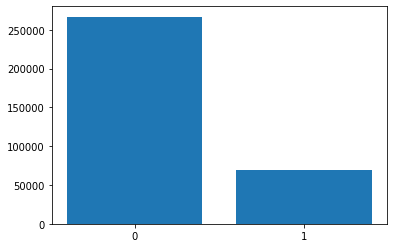

In [ ]:
import matplotlib.pyplot as plt
plt.xticks([0,1])
plt.bar(df_final['class'].value_counts().index,df_final['class'].value_counts());

In [ ]:
print("None-Hate : ",df_final['class'].value_counts()[0])
print("Hate : ",df_final['class'].value_counts()[1])
ratio_hate = df_final['class'].value_counts()[1]/(df_final['class'].value_counts()[1]+df_final['class'].value_counts()[0])
print("Ratio : ", round(ratio_hate*100,4),"%")

None-Hate :  266834
Hate :  69133
Ratio :  20.5773 %


In [ ]:
df_final = df_final[['text','cleaned','class']]
df_final.to_csv("/content/drive/MyDrive/HateSpeech/TODA/TODA_Dataset.csv",encoding='utf-8')

In [ ]:
df_final.isna().sum()

text       0
cleaned    0
class      0
dtype: int64

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/HateSpeech/TODA/TODA_Dataset.csv")

In [ ]:
df[df['cleaned'].isna()]

,Unnamed: 0,text,cleaned,class
123,123,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,NaN,0
173,173,https://youtu.be/VtIQrP6FvOo,NaN,0
249,249,https://twitter.com/somethingtexty,NaN,0
254,254,https://www.westernjournal.com/ct/police-union...,NaN,0
332,332,https://youtu.be/3SKXQeD_nOs,NaN,0
...,...,...,...,...
334166,334166,http://www.venetofronteskinheads.org...mmer_20...,NaN,0
335167,335167,http://www.newportcity.blogspot.com/,NaN,0
335197,335197,http://www.irish-nationalism.com/forum/,NaN,0
335666,335666,http://apod.nasa.gov/apod/astropix.html,NaN,0


In [ ]:
df = df.dropna()
df.isna().sum()

Unnamed: 0    0
text          0
cleaned       0
class         0
dtype: int64

In [ ]:
df

,Unnamed: 0,text,cleaned,class
0,0,This is what the left is really scared of. ...,This is what the left is really scared of,0
1,1,That literally looks like a monkey. Why are we...,That literally looks like a monkey Why are we ...,0
2,2,It makes you an asshole.,It makes you an asshole,0
3,3,"So they manage to provide a whole lot of data,...",So they manage to provide a whole lot of data ...,0
4,4,"Hi there, i,m Keith, i hope you are doing well...",Hi there im Keith i hope you are doing well i ...,0
...,...,...,...,...
335962,335962,"Billy - `` That guy would n't leave me alone ,...",Billy That guy would n't leave me alone so ...,0
335963,335963,Wish we at least had a Marine Le Pen to vote f...,Wish we at least had a Marine Le Pen to vote f...,0
335964,335964,Its like the choices are white genocide candid...,Its like the choices are white genocide candid...,0
335965,335965,Why White people used to say that sex was a si...,Why White people used to say that sex was a si...,1


In [ ]:
print("None-Hate : ",df['class'].value_counts()[0])
print("Hate : ",df['class'].value_counts()[1])
ratio_hate = df['class'].value_counts()[1]/(df['class'].value_counts()[1]+df['class'].value_counts()[0])
print("Ratio : ", round(ratio_hate*100,4),"%")

None-Hate :  265822
Hate :  69077
Ratio :  20.6262 %


In [ ]:
df.to_csv("/content/drive/MyDrive/HateSpeech/TODA/TODA_cleand.csv")

# TYPO CORRECTION

## import


In [ ]:
!sudo apt-get install swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 0s (7,676 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: 

In [ ]:
!sudo pip install jamspell

     |████████████████████████████████| 184kB 15.2MB/s 
  Created wheel for jamspell: filename=jamspell-0.0.12-cp37-cp37m-linux_x86_64.whl size=1347456 sha256=81744c13cfccd90cba7f0526da77c5a51f5ae0072fe501c5f94c8c8f285fcefc
  Stored in directory: /root/.cache/pip/wheels/ed/f1/0e/4a173a979c77db7fdb3590ab530f2e8334fa3cdedc079ac932
Successfully built jamspell


In [ ]:
!wget https://github.com/bakwc/JamSpell-models/raw/master/en.tar.gz

--2021-06-26 20:55:59--  https://github.com/bakwc/JamSpell-models/raw/master/en.tar.gz
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bakwc/JamSpell-models/master/en.tar.gz [following]
--2021-06-26 20:55:59--  https://raw.githubusercontent.com/bakwc/JamSpell-models/master/en.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36611828 (35M) [application/octet-stream]
Saving to: ‘en.tar.gz’

en.tar.gz           100%[===================>]  34.92M   119MB/s    in 0.3s    

2021-06-26 20:56:01 (119 MB/s) - ‘en.tar.gz’ saved [36611828/36611828]



In [ ]:
!tar -xvf en.tar.gz

en.bin


In [ ]:
import pandas as pd
TODA = pd.read_csv("/content/drive/MyDrive/HateSpeech/temp_100000.csv").iloc[:,1:]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
TODA.isna().sum()

text            0
cleaned         0
class           0
jspell     234898
dtype: int64

In [ ]:
TODA2 = TODA[(TODA['length']<1000)].reset_index(drop=True)

In [ ]:
TODA2

,text,cleaned,class,jspell,length
0,This is what the left is really scared of. ...,This is what the left is really scared of,0,This is what the left is really scared of,45
1,That literally looks like a monkey. Why are we...,That literally looks like a monkey Why are we ...,0,That literally looks like a monkey Why are we ...,104
2,It makes you an asshole.,It makes you an asshole,0,It makes you an asshole,23
3,"So they manage to provide a whole lot of data,...",So they manage to provide a whole lot of data ...,0,So they manage to provide a whole lot of data ...,223
4,"Hi there, i,m Keith, i hope you are doing well...",Hi there im Keith i hope you are doing well i ...,0,Hi there is Keith i hope you are doing well i ...,123
...,...,...,...,...,...
321711,"Billy - `` That guy would n't leave me alone ,...",Billy That guy would n't leave me alone so ...,0,NaN,79
321712,Wish we at least had a Marine Le Pen to vote f...,Wish we at least had a Marine Le Pen to vote f...,0,NaN,59
321713,Its like the choices are white genocide candid...,Its like the choices are white genocide candid...,0,NaN,60
321714,Why White people used to say that sex was a si...,Why White people used to say that sex was a si...,1,NaN,159


In [ ]:
import jamspell
jsp = jamspell.TSpellCorrector()
assert jsp.LoadLangModel('en.bin')

In [ ]:
for i in range(len(TODA2)):
  TODA2['jspell'][i]=jsp.FixFragment(TODA2['cleaned'][i])
  if i % 5000 == 0 : print(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000
310000
315000
320000


In [ ]:
TODA2

,text,cleaned,class,jspell,length
0,This is what the left is really scared of. ...,This is what the left is really scared of,0,This is what the left is really scared of,45
1,That literally looks like a monkey. Why are we...,That literally looks like a monkey Why are we ...,0,That literally looks like a monkey Why are we ...,104
2,It makes you an asshole.,It makes you an asshole,0,It makes you an asshole,23
3,"So they manage to provide a whole lot of data,...",So they manage to provide a whole lot of data ...,0,So they manage to provide a whole lot of data ...,223
4,"Hi there, i,m Keith, i hope you are doing well...",Hi there im Keith i hope you are doing well i ...,0,Hi there is Keith i hope you are doing well i ...,123
...,...,...,...,...,...
321711,"Billy - `` That guy would n't leave me alone ,...",Billy That guy would n't leave me alone so ...,0,Billy That guy would n't leave me alone so ...,79
321712,Wish we at least had a Marine Le Pen to vote f...,Wish we at least had a Marine Le Pen to vote f...,0,Wish we at least had a Marine Le Pen to vote f...,59
321713,Its like the choices are white genocide candid...,Its like the choices are white genocide candid...,0,Its like the choices are white genocide candid...,60
321714,Why White people used to say that sex was a si...,Why White people used to say that sex was a si...,1,Why White people used to say that sex was a si...,159


In [ ]:
TODA2.to_csv("/content/drive/MyDrive/HateSpeech/TODA/TODA_typo.csv")